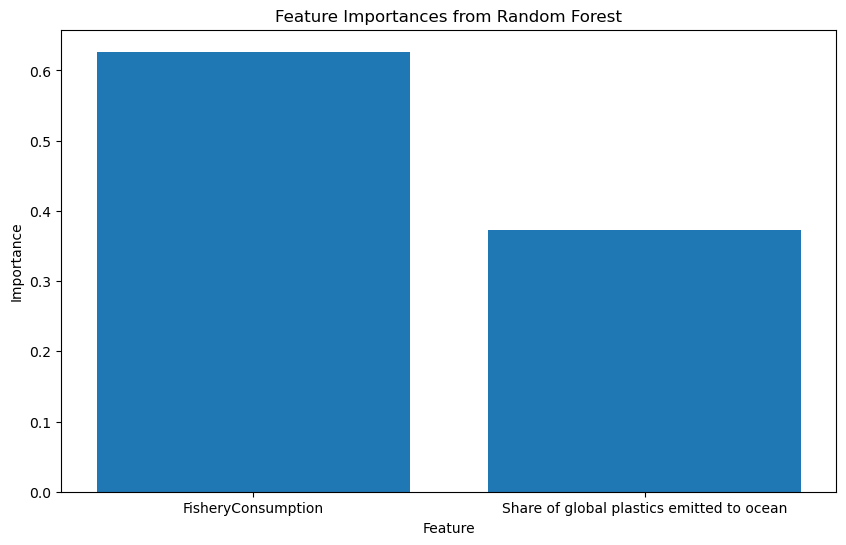

                                     Feature  Importance
1                         FisheryConsumption    0.626674
0  Share of global plastics emitted to ocean    0.373326


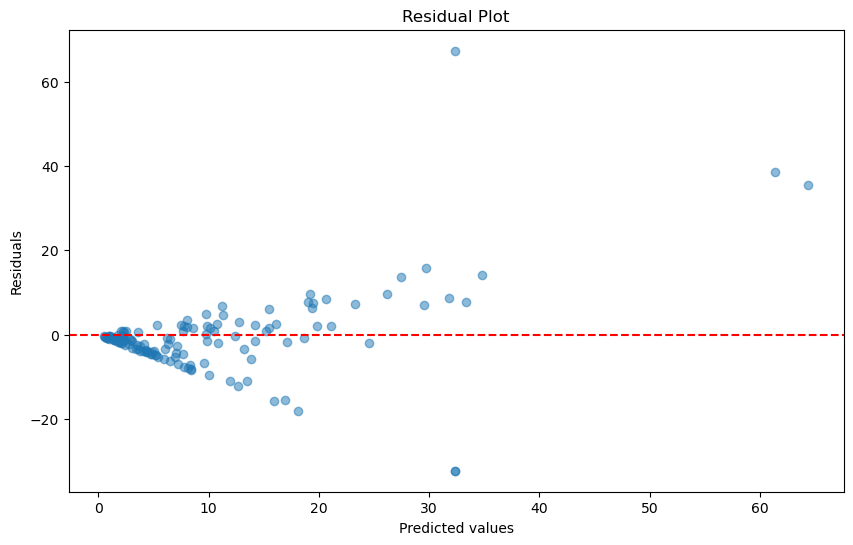

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
file_path = 'input.csv'
df = pd.read_csv(file_path)

# Prepare the data with multiple features
X = df[[ 'Share of global plastics emitted to ocean', 'FisheryConsumption']]  
y = df['MPA']

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
y_pred = rf.predict(X)
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for plotting
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

print(importances_df)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

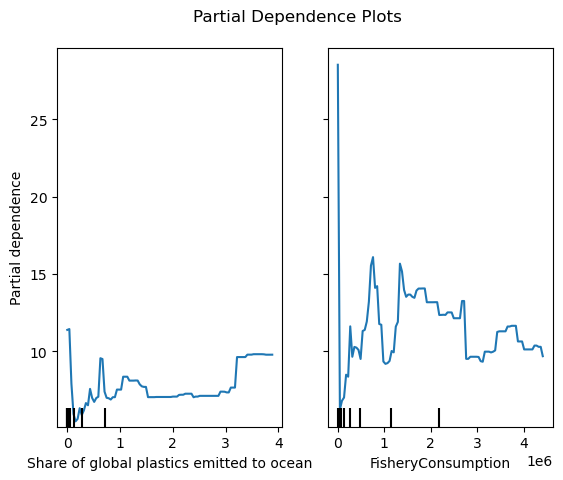

In [26]:
from sklearn.inspection import PartialDependenceDisplay

# Create a PartialDependenceDisplay object
display = PartialDependenceDisplay.from_estimator(
    rf, X, features=[0, 1], feature_names=X.columns
)

# Show the plots
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()


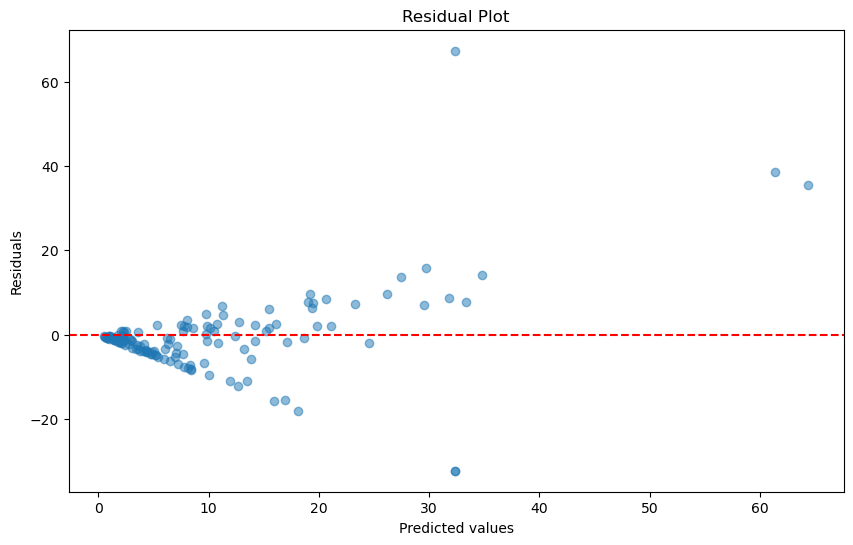

In [30]:
# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
